In [89]:
import pandas as pd

In [90]:
df = pd.read_csv("Group_By/weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


Text(0.5, 0, 'wind speed')

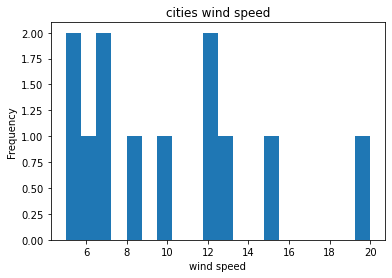

In [91]:
ax = df["windspeed"].plot(kind="hist",
                           bins=20,
                           title="cities wind speed")
ax.set_xlabel("wind speed")

Text(0.5, 0, 'wind speed')

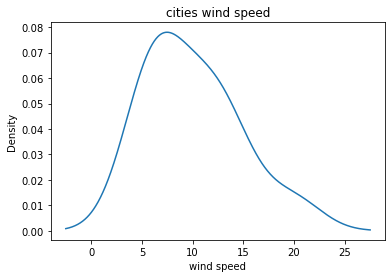

In [92]:
ax = df["windspeed"].plot(kind="kde",  ##kernel density plot
                           title="cities wind speed")
ax.set_xlabel("wind speed")

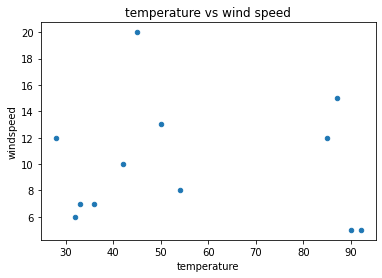

In [93]:
df.plot(kind="scatter",x="temperature",y="windspeed",
       title="temperature vs wind speed");

<AxesSubplot:xlabel='temperature', ylabel='windspeed'>

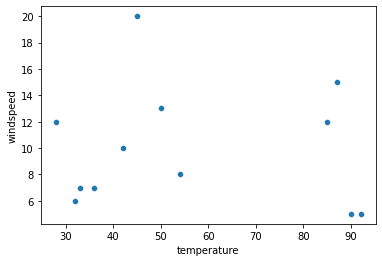

In [94]:
import seaborn as sns

sns.scatterplot(x="temperature",y="windspeed",data=df)

<AxesSubplot:xlabel='temperature', ylabel='windspeed'>

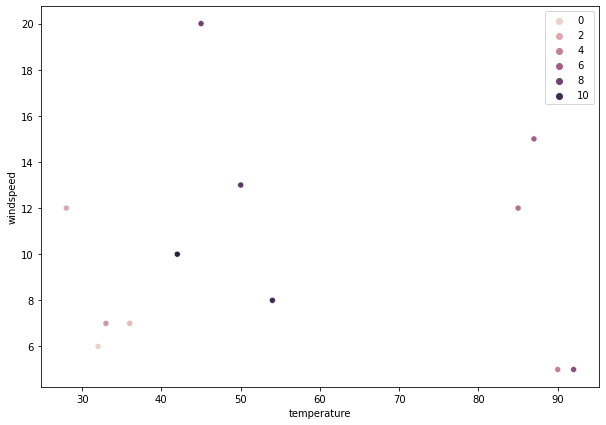

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.scatterplot(x="temperature",y="windspeed",data=df, hue=df.index, )

In [96]:
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [97]:
##same as below onehotencoder method
# df = df.drop(columns=["day"])
# df = pd.get_dummies(df,columns=["event","city"])
# df

In [98]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import numpy as np

ohe = OneHotEncoder()
feature_array = ohe.fit_transform(df[["event","city"]]).toarray()
feature_array.shape

(12, 8)

In [99]:
feature_labels = ohe.categories_
feature_labels

[array(['Cloudy', 'Fog', 'Rain', 'Snow', 'Sunny'], dtype=object),
 array(['mumbai', 'new york', 'paris'], dtype=object)]

In [100]:
feature_labels  = np.concatenate([feature_labels[1],feature_labels[0]])
feature_labels 

array(['mumbai', 'new york', 'paris', 'Cloudy', 'Fog', 'Rain', 'Snow',
       'Sunny'], dtype=object)

In [101]:
ohe_df = pd.DataFrame(feature_array,columns=feature_labels)
ohe_df

,mumbai,new york,paris,Cloudy,Fog,Rain,Snow,Sunny
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [102]:
df = df.drop(columns=["day","event","city"])
df


,temperature,windspeed
0,32,6
1,36,7
2,28,12
3,33,7
4,90,5
5,85,12
6,87,15
7,92,5
8,45,20
9,50,13


In [103]:
df = pd.concat([df,ohe_df],axis=1)
df

,temperature,windspeed,mumbai,new york,paris,Cloudy,Fog,Rain,Snow,Sunny
0,32,6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,36,7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,28,12,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,33,7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,90,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,85,12,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,87,15,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,92,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,45,20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,50,13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


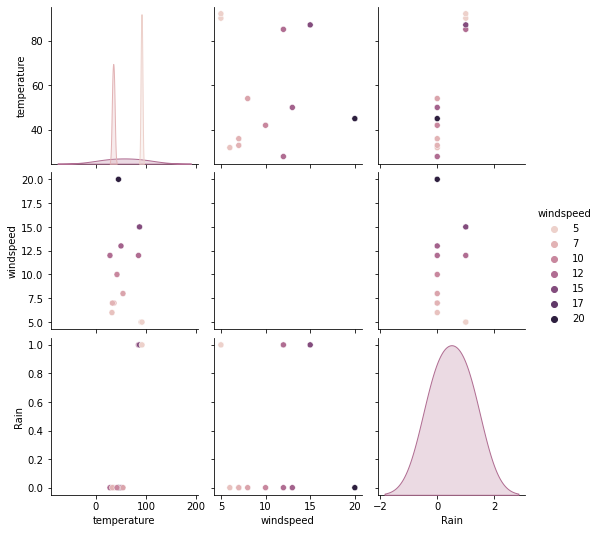

In [104]:
sns.pairplot(df,vars=["temperature","windspeed","Rain"],hue="windspeed")

In [105]:
df_corr = df.loc[:,"temperature":"paris"].corr()
df_corr

,temperature,windspeed,mumbai,new york,paris
temperature,1.000000,-0.073031,-0.180583,0.556408,0.108795
windspeed,-0.073031,1.000000,0.043959,0.357528,-0.459679
mumbai,-0.180583,0.043959,1.000000,-0.258199,-0.258199
new york,0.556408,0.357528,-0.258199,1.000000,-0.200000
paris,0.108795,-0.459679,-0.258199,-0.200000,1.000000


<AxesSubplot:>

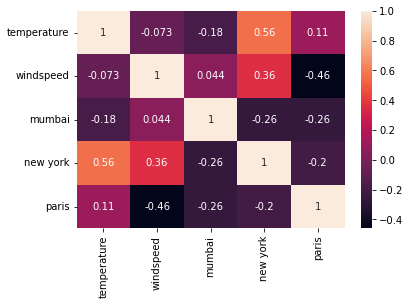

In [106]:
sns.heatmap(df_corr, annot=True)

In [107]:
df

,temperature,windspeed,mumbai,new york,paris,Cloudy,Fog,Rain,Snow,Sunny
0,32,6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,36,7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,28,12,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,33,7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,90,5,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
5,85,12,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,87,15,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
7,92,5,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,45,20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,50,13,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [129]:
# same as below
df.query('windspeed != 12').groupby("windspeed")["temperature"]\
    .agg(["mean","count"])\
    .query('count<2')\
    .sort_values(by="mean")



,mean,count
windspeed,,
6,32.0,1
10,42.0,1
20,45.0,1
13,50.0,1
8,54.0,1
15,87.0,1


Text(0.5, 0, 'average temperature')

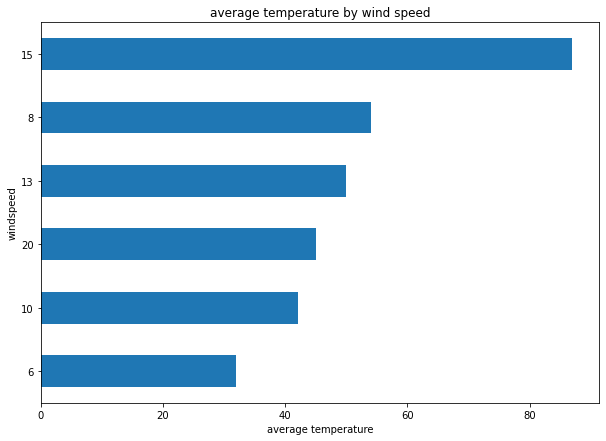

In [128]:
#what are the average temperatures for different wind speeds? and how many temperature data for each wind speed ?
filt = df["windspeed"] != 12

ax = df.loc[filt].groupby("windspeed")["temperature"]\
    .agg(["mean","count"])\
    .query('count<2')\
    .sort_values(by="mean")["mean"]\
    .plot(kind="barh",figsize=(10,7),title="average temperature by wind speed")

ax.set_xlabel("average temperature")